<a href="https://colab.research.google.com/github/HHansi/Applied-AI-Course/blob/main/Time%20Series%20Analysis/Time_Series_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Processing

This notebook contains the practical examples and exercises for the Applied AI-Time Series Processing. 

*Adapted from a tutorial by Dr Iain Rice. Modified by Hansi Hettiarachchi.*


Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import itertools
from sklearn.metrics import mean_squared_error

# Stationarity

In [2]:
# load the data set
# As the parameter, the file path should be provided. Additionally, GitHub URL can also be provided as follows.
df = pd.read_csv('https://raw.githubusercontent.com/HHansi/Applied-AI-Course/main/Time%20Series%20Analysis/data/international-airline-passengers.csv')

# rename column name
df = df.rename(columns={"International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60": "Sales"})
# convert month to int
df['Month-No'] = list(range(0, len(df['Month'])))

df.head()

,Month,Sales,Month-No
0,1949-01,112,0
1,1949-02,118,1
2,1949-03,132,2
3,1949-04,129,3
4,1949-05,121,4


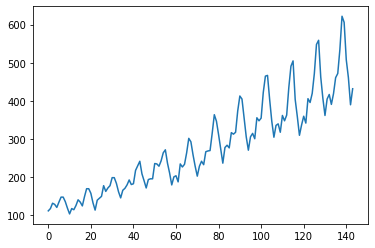

In [3]:
# plot time series
plt.plot(df['Month-No'],df['Sales'])
plt.xticks(np.arange(min(df['Month-No']), max(df['Month-No'])+1, 20)) # define x-axis step size
plt.show()

[KPSS Test for Stationarity](https://www.machinelearningplus.com/time-series/kpss-test-for-stationarity/)

In [4]:
# check stationarity of the series
def check_stationarity(series):
  statistic, p_value, n_lags, critical_values = sm.tsa.stattools.kpss(series)
  print(f'p value: {p_value}')
  print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary \n')

In [5]:
check_stationarity(df['Sales'])

p value: 0.01
Result: The series is not stationary 



/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


## Log Transformation

In [6]:
# add new column 'Log-Sales' with log transformed values
df['Log-Sales'] = np.log(df['Sales']) 

print(df.shape)
df.head()

(144, 4)


,Month,Sales,Month-No,Log-Sales
0,1949-01,112,0,4.718499
1,1949-02,118,1,4.770685
2,1949-03,132,2,4.882802
3,1949-04,129,3,4.859812
4,1949-05,121,4,4.795791


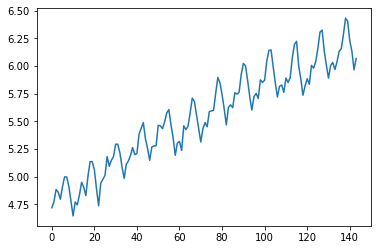

In [7]:
# plot time series
plt.plot(df['Month-No'],df['Log-Sales'])
plt.xticks(np.arange(min(df['Month-No']), max(df['Month-No'])+1, 20)) # define x-axis step size
plt.show()

## Deseasonalisation

In [8]:
df['Deseasonalised-Sales'] = df[['Log-Sales']].diff(axis=0, periods=12)
df.head(15)

,Month,Sales,Month-No,Log-Sales,Deseasonalised-Sales
0,1949-01,112,0,4.718499,NaN
1,1949-02,118,1,4.770685,NaN
2,1949-03,132,2,4.882802,NaN
3,1949-04,129,3,4.859812,NaN
4,1949-05,121,4,4.795791,NaN
5,1949-06,135,5,4.905275,NaN
6,1949-07,148,6,4.997212,NaN
7,1949-08,148,7,4.997212,NaN
8,1949-09,136,8,4.912655,NaN
9,1949-10,119,9,4.779123,NaN


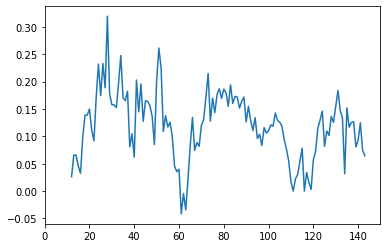

In [9]:
# plot time series
plt.plot(df['Month-No'],df['Deseasonalised-Sales'])
plt.xticks(np.arange(min(df['Month-No']), max(df['Month-No'])+1, 20)) # define x-axis step size
plt.show()

## Differencing

In [10]:
df['Differenced-Sales'] = df[['Deseasonalised-Sales']].diff(axis=0, periods=1)
df.head(15)

,Month,Sales,Month-No,Log-Sales,Deseasonalised-Sales,Differenced-Sales
0,1949-01,112,0,4.718499,NaN,NaN
1,1949-02,118,1,4.770685,NaN,NaN
2,1949-03,132,2,4.882802,NaN,NaN
3,1949-04,129,3,4.859812,NaN,NaN
4,1949-05,121,4,4.795791,NaN,NaN
5,1949-06,135,5,4.905275,NaN,NaN
6,1949-07,148,6,4.997212,NaN,NaN
7,1949-08,148,7,4.997212,NaN,NaN
8,1949-09,136,8,4.912655,NaN,NaN
9,1949-10,119,9,4.779123,NaN,NaN


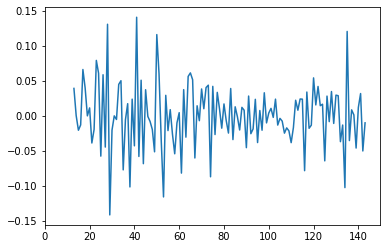

In [11]:
# plot time series
plt.plot(df['Month-No'],df['Differenced-Sales'])
plt.xticks(np.arange(min(df['Month-No']), max(df['Month-No'])+1, 20))  # define x-axis step size
plt.show()

In [12]:
check_stationarity(df['Differenced-Sales'][13:])

p value: 0.1
Result: The series is stationary 



/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


# Embedding

In [13]:
# load the data set
# As the parameter, the file path should be provided. Additionally, GitHub URL can also be provided as follows.
df = pd.read_csv('https://raw.githubusercontent.com/HHansi/Applied-AI-Course/main/Time%20Series%20Analysis/data/international-airline-passengers.csv')

# rename column name
df = df.rename(columns={"International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60": "Sales"})
# convert month to int
df['Month-No'] = list(range(0, len(df['Month'])))

df.head()

,Month,Sales,Month-No
0,1949-01,112,0
1,1949-02,118,1
2,1949-03,132,2
3,1949-04,129,3
4,1949-05,121,4


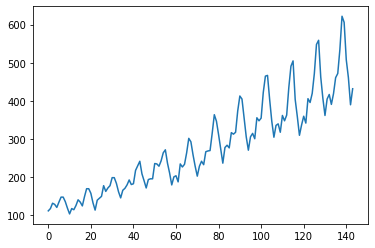

In [14]:
# plot time series
plt.plot(df['Month-No'],df['Sales'])
plt.xticks(np.arange(min(df['Month-No']), max(df['Month-No'])+1, 20)) # define x-axis step size
plt.show()

In [15]:
# get values in column 'Sales' as a numpy array
x = df['Sales'].to_numpy()

print(f"Shape of data: {x.shape}")
print(x[:10])

Shape of data: (144,)
[112 118 132 129 121 135 148 148 136 119]


In [16]:
# get delay embedding series
print("\nStacked data with delay embedding 2:")
X_2 = np.vstack((x[:-1], x[1:])).T
print(X_2[:5,:])

print("\nStacked data with delay embedding 3:")
X_3 = np.vstack((x[:-2], x[1:-1], x[2:])).T
print(X_3[:5,:])


Stacked data with delay embedding 2:
[[112 118]
 [118 132]
 [132 129]
 [129 121]
 [121 135]]

Stacked data with delay embedding 3:
[[112 118 132]
 [118 132 129]
 [132 129 121]
 [129 121 135]
 [121 135 148]]


In [17]:
u,s,v = np.linalg.svd(X_3)
print("Relative importance of each dimension for an order 3 delay embedding:")
print(s/max(s))

print("Relative importance of each dimension for an order 4 delay embedding:")
X_4 = np.vstack((x[:-3],x[1:-2],x[2:-1],x[3:])).T
u,s,v = np.linalg.svd(X_4)
print(s/max(s))

print("Relative importance of each dimension for an order 5 delay embedding:")
X_5 = np.vstack((x[:-4],x[1:-3],x[2:-2],x[3:-1],x[4:])).T
u,s,v = np.linalg.svd(X_5)
print(s/max(s))

print("Relative importance of each dimension for an order 6 delay embedding:")
X_6 = np.vstack((x[:-5],x[1:-4],x[2:-3],x[3:-2],x[4:-1],x[5:])).T
u,s,v = np.linalg.svd(X_6)
print(s/max(s))

Relative importance of each dimension for an order 3 delay embedding:
[1.         0.07314624 0.03079164]
Relative importance of each dimension for an order 4 delay embedding:
[1.         0.08563985 0.04097847 0.02113348]
Relative importance of each dimension for an order 5 delay embedding:
[1.         0.09365044 0.05068503 0.02562099 0.01767495]
Relative importance of each dimension for an order 6 delay embedding:
[1.         0.09720604 0.05926447 0.02955839 0.02112643 0.01479424]


So approximately 2 of singular values contain 95% of the relative importance. So we should embed this data in a 2(2)+1 = 5 dimensional space to model it accurately. Note that this would typically be done AFTER the data has been made stationary.